In [1]:
import pickle
import numpy as np
import math

import matplotlib.pyplot as plt

import spectres

In [2]:
def read_linear_restframe_spectrum_file (specObjID):
    
    with open('./Spectra/' + specObjID + '.spec', 'rb') as filehandle:  
        # read the data as binary data stream
        [wavelength, flux, ivar, and_mask, or_mask] = pickle.load(filehandle)
    return [wavelength, flux, ivar, and_mask, or_mask]

In [3]:
def rebin_spectrum (specObjID, bin_width):
    [wavelength, flux, ivar, and_mask, or_mask] = read_linear_restframe_spectrum_file (specObjID)
    spectrum = np.asarray([wavelength, flux, ivar]).transpose()
    # truncate range a bit so it fits as required by SpectRes
    lambda_min = float(math.ceil(wavelength.min())) + (bin_width / 2.0)
    lambda_max = float(math.floor(wavelength.max())) - (bin_width / 2.0)
    regrid = np.arange(lambda_min, lambda_max, bin_width) + 2.
    spec_resample, spec_errs_resample = spectres.spectres(regrid, spectrum[:,0], spectrum[:,1], spec_errs=spectrum[:,2])
    return ([regrid, spec_resample, spec_errs_resample])

In [ ]:
# targets 3130Å 100, 1750Å 222  5130Å 58.7

In [4]:
# tolerance is the number of bin widths over which we'll average - must be even
def normalize_spectrum (specObjID, bin_width, tolerance):
    targets = [3130., 1750., 5130.]
    scales = [100.,222.,58.7]
    [x, y, errs]=rebin_spectrum (specObjID, bin_width)
    valid_targets = list(filter(lambda z: z < (x.max() - tolerance*bin_width), targets))
    valid_targets = list(filter(lambda z: z > (x.min() + tolerance*bin_width), valid_targets))
    # use default target if valid
    if 3130. in valid_targets:
        target = 3130.
        scale = 100.
    else:
    #only one will remain, so pick the scale associated with it
        target = valid_targets[0]
        scale = scales[targets.index(target)]
    print (x.min())
    print (x.max())
    print (target)
    print (scale)
    n = int(tolerance/2)
    print (n)
    target_index = np.argwhere(x > target)[0][0]
    print (target_index)
    # need to add 1 because arange is weird
    target_index_list = np.arange(target_index - n, target_index + n + 1 )
    print (target_index_list)
    y_sum = 0.
    for z in target_index_list:
        y_sum += y[z]
    print (y_sum)
    y_mean = y_sum / len(target_index_list)
    print (y_mean)
    y *= scale/y_mean
    print (y[target_index + 1])
    
    #seems to be working - now need to return values
    #should prob then write to a different directory

In [5]:
normalize_spectrum ('299551250096089088', 20.0, 2.0)

1475.0
3495.0
3130.0
100.0
1
83
[82 83 84]
11.03109768931754
3.677032563105847
101.13791662086788


In [137]:
print  (np.arange(82, 85))

[82 83 84]


In [8]:
[x,y,errors]=rebin_spectrum ('299490227200747520', 4.0)

<function matplotlib.pyplot.show(*args, **kw)>

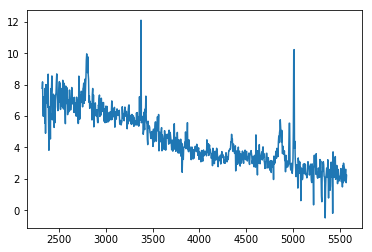

In [9]:
plt.plot(x,y)
plt.show